In [149]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5478,ham,No probably &lt;#&gt; %.,NaN,NaN,NaN
4499,ham,Nvm take ur time.,NaN,NaN,NaN
3463,ham,My phone,NaN,NaN,NaN
4853,ham,"Also north carolina and texas atm, you would j...",NaN,NaN,NaN
3345,ham,U're welcome... Caught u using broken english ...,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
# 1. Data Cleaning
# 2. Exploratory Data Analysis
# 3. Text Prepocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deployment


1. Data Cleaning
   

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
# Because multiple values are null in the last three columns, I'll drop these columns.
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True) 
# inplace = true -> Because, it will directly modify the orginal dataframe and will not create a new one.

In [9]:
df.sample(5)

,v1,v2
4906,ham,Then anything special?
225,ham,Would really appreciate if you call me. Just n...
2638,ham,Am in gobi arts college
3861,ham,"Customer place, i wil cal u sir."
5516,ham,"Ya, i'm referin to mei's ex wat... No ah, wait..."


In [10]:
# I'm renaming the columns to make it more understandable
df.rename(columns={'v1':'target','v2':'text'}, inplace=True)

In [11]:
df.sample(5)

,target,text
4405,spam,As one of our registered subscribers u can ent...
3960,ham,Your dad is back in ph?
252,ham,What you doing?how are you?
4710,ham,Huh so slow i tot u reach long ago liao... U 2...
1696,ham,"Sorry man, my stash ran dry last night and I c..."


In [12]:
# spam and ham in target column are basically labels. To encode them with numbers as 1 and 0, I am doing the following operations.
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
df['target'] = encoder.fit_transform(df['target'])

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
# To check if there are any missing values present or not, I am doing the following operations.
df.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
# To check if there are any duplicate values present or not, I am doing the following operations.
df.duplicated().sum()

np.int64(403)

In [17]:
# To remove duplicates
df = df.drop_duplicates(keep='first') 
# keep='first' -> Removing the duplicate rows while keeping the first occurence of each duplicate row. (keep = false)

In [18]:
df.duplicated().sum()

np.int64(0)

In [19]:
df.shape

(5169, 2)

2. Exploratory Data Analysis (EDA)

In [20]:
df.sample()

,target,text
541,0,A famous quote : when you develop the ability ...


In [21]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

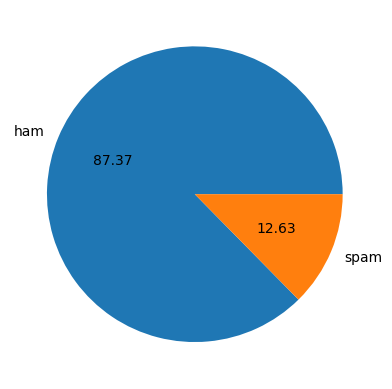

In [22]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [23]:
# Our data is imbalanced, because there are more ham messages than spam.

In [24]:
import nltk

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tushar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
df['num_characters'] = df['text'].apply(len) # We are finding the number of characters in a particular sms.

In [27]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [28]:
# Number of words
df['text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [29]:
df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5169, dtype: int64

In [30]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [31]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [32]:
df['text'].apply(lambda x:nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [33]:
df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: text, Length: 5169, dtype: int64

In [34]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [35]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [36]:
df.drop(columns=['num_sentence'],inplace=True)

KeyError: "['num_sentence'] not found in axis"

In [37]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [38]:
# Now, we are checking the detailed information about the newly created last three columns.
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [39]:
# Description about the ham messages which are present in the newly created columns.
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [40]:
# Description about the spam messages which are present in the newly created columns.
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [41]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

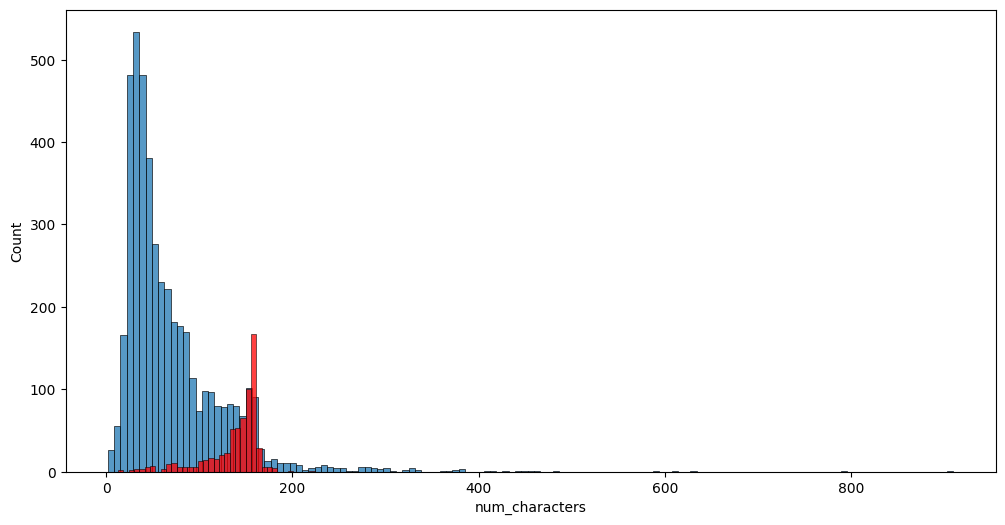

In [42]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

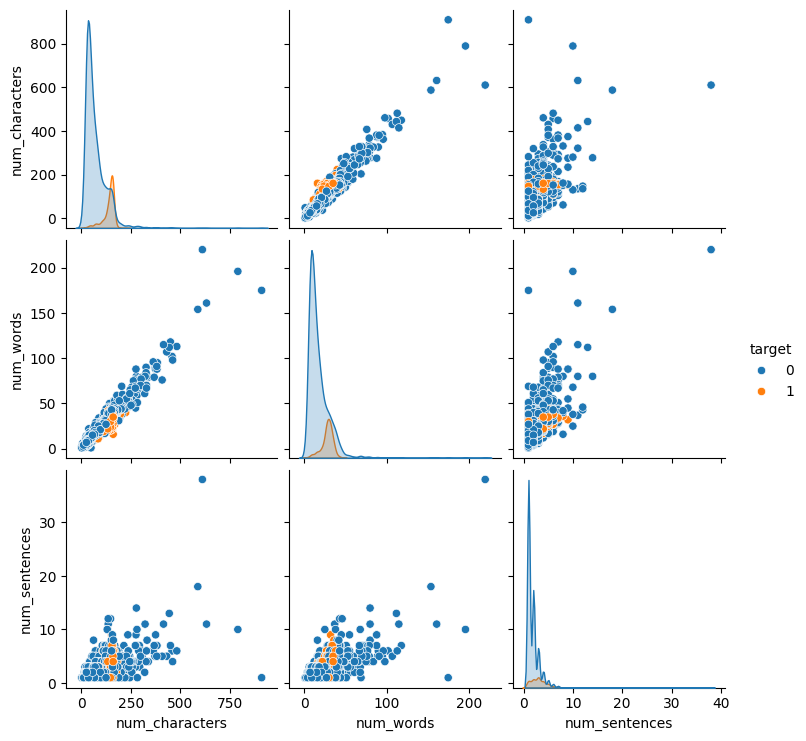

In [43]:
# I'm checking the correlations that are present among the columns.
sns.pairplot(df,hue='target')

<Axes: >

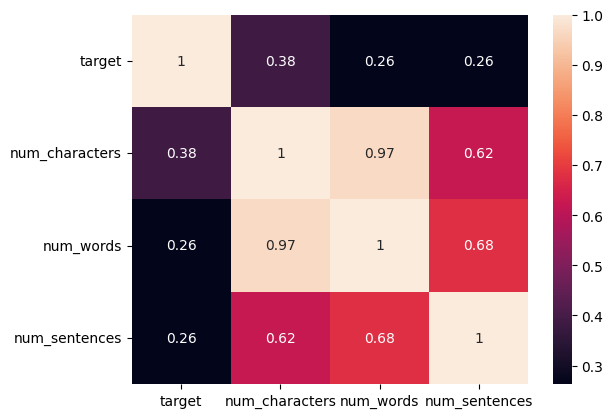

In [53]:
# Finding correlation coefficient
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True)

# Because the variation between target and num_characters is more, we are going to work on num_characters column.

3. Data Preprocessing
   - Conversion in lowercase
   - Tokenization
   - Removing special characters
   - Removing stop words and punctuations
   - Stemming

In [58]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum(): # We are keeping only those characters which are alphabetic and alphanumeric.
            y.append(i)

    # text = y -> I can not copy list like this, because it is a mutable datatyple. The solution is cloning.
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
             
    return " ".join(y) # Combining or joining a list of words in a single string.

In [59]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [60]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [64]:
transform_text('Hi, You Are Giving Your 100%')

'hi give 100'

In [65]:
# I'm performing the stemming operation.
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('Dancing')

'danc'

In [66]:
df['transformed_text'] = df['text'].apply(transform_text)

In [67]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [68]:
# Generating the word cloud of spam messages.
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [69]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

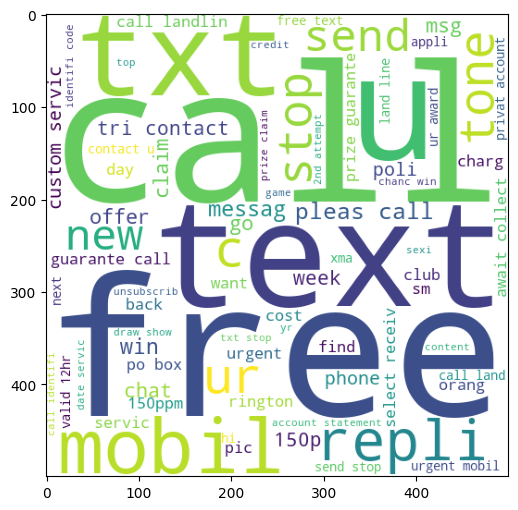

In [70]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [71]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

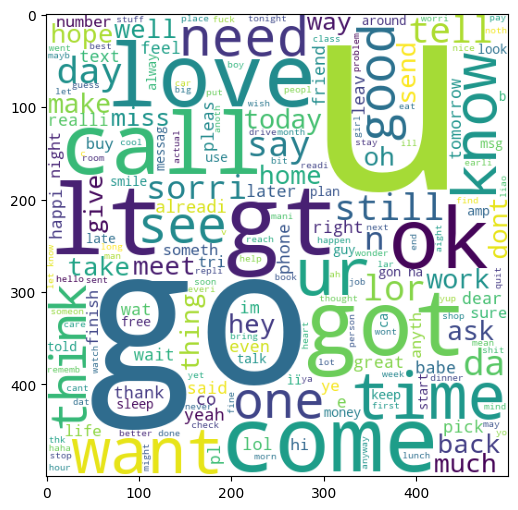

In [72]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [73]:
# Finding the top 30 words that are present in a spam messages. For that, we are going to write a custom code.
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [74]:
len(spam_corpus)

9939

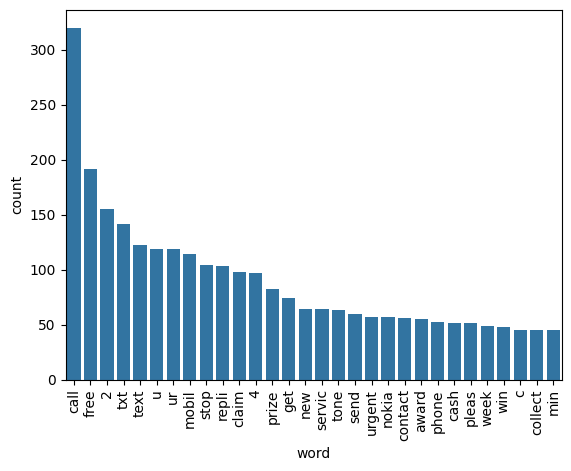

In [75]:
from collections import Counter
df_word_freq = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=["word", "count"])
sns.barplot(x="word", y="count", data=df_word_freq)
plt.xticks(rotation='vertical')
plt.show()

In [76]:
# Finding the top 30 words that are present in ham messages. For that, we are going to write a custom code.
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [77]:
len(ham_corpus)

35404

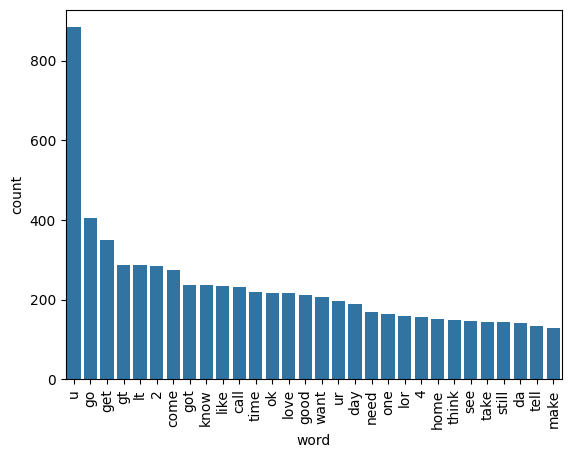

In [78]:
from collections import Counter
df_word_freq = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=["word", "count"])
sns.barplot(x="word", y="count", data=df_word_freq)
plt.xticks(rotation='vertical')
plt.show()

4. Model Building

In [165]:
# Converting text data into a numerical format. It means, we are vectorizing an input data.
# First we are using Bag of Words method.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

# -> CountVectorizer - Bag of Words

In [170]:
X_train_tfidf = tfidf.fit_transform(X_train)  # Fitting and transform training data
X_test_tfidf = tfidf.transform(X_test)

In [171]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
# Here, one process includes conversion of parse array into dence array.

In [172]:
# Here, I did not used standard scaler because It also gives negative values which a naive bayes algorithm does not accept.

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# x = scaler.fit_transform(X)

# It did not helped in enhancing the accuracy and precision scores. Therefore, I'm not using it in my model.

In [173]:
# I'm appending the num_characters column to X
X = np.hstack((X, df['num_characters'].values.reshape(-1,1)))

In [174]:
X

array([[  0.,   0.,   0., ...,   0.,   0., 111.],
       [  0.,   0.,   0., ...,   0.,   0.,  29.],
       [  0.,   0.,   0., ...,   0.,   0., 155.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,  57.],
       [  0.,   0.,   0., ...,   0.,   0., 125.],
       [  0.,   0.,   0., ...,   0.,   0.,  26.]])

In [175]:
X.shape

(5169, 3001)

In [176]:
y = df['target'].values

In [177]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [178]:
from sklearn.model_selection import train_test_split

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
# I'm sending 20% data for testing.

In [180]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# Remember the point that sms/email spam classifier is high precision model.

In [181]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [182]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8945841392649904
[[808  88]
 [ 21 117]]
0.5707317073170731


In [183]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9390715667311412
[[896   0]
 [ 63  75]]
1.0


In [184]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [185]:
# I have choosen tfidf and then mnb. Because, mnb is giving really good precision score compared to other algorithms.
# As the data is imbalanced, I'm emphasizing more on precision score.
# Accuracy may not always be reliable when dealing with imbalanced datasets.

In [186]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score

# Initializing classifiers
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

# Dictionary of classifiers
clfs = {
    'SVC': svc,
    'KNeighbors': knc,
    'Naive Bayes': mnb,
    'Decision Tree': dtc,
    'Logistic Regression': lrc,
    'Random Forest': rfc,
    'AdaBoost': abc,
    'Bagging Classifier': bc,
    'Extra Trees': etc,
    'Gradient Boosting': gbdt,
    'XGBoost': xgb
}

# I'm defining a function to train and evaluate classifiers
def train_classifier(clf, X_train, y_train, X_test, y_test):
    # Training the classifier
    clf.fit(X_train, y_train)
    # Predicting on test data
    y_pred = clf.predict(X_test)
    # Calculating metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')  # Using average='binary' for binary classification
    return accuracy, precision

# Initializing lists to store scores
accuracy_scores = []
precision_scores = []

# Training and evaluating each classifier
for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)

    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)

    # Appending scores to the lists
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


C:\Users\Tushar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


For  SVC
Accuracy -  0.8665377176015474
Precision -  0.0
For  KNeighbors
Accuracy -  0.9332688588007737
Precision -  0.822429906542056
For  Naive Bayes
Accuracy -  0.9390715667311412
Precision -  1.0
For  Decision Tree
Accuracy -  0.9468085106382979
Precision -  0.8807339449541285
For  Logistic Regression
Accuracy -  0.960348162475822
Precision -  0.9619047619047619
For  Random Forest
Accuracy -  0.971953578336557
Precision -  0.9823008849557522


C:\Users\Tushar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9642166344294004
Precision -  0.9243697478991597
For  Bagging Classifier
Accuracy -  0.960348162475822
Precision -  0.8592592592592593
For  Extra Trees
Accuracy -  0.97678916827853
Precision -  0.975
For  Gradient Boosting
Accuracy -  0.9497098646034816
Precision -  0.93
For  XGBoost
Accuracy -  0.9671179883945842
Precision -  0.940677966101695


In [187]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [188]:
# I'm sorting the DataFrame on the basis of precision score in descending order.

In [189]:
performance_df

,Algorithm,Accuracy,Precision
2,Naive Bayes,0.939072,1.000000
5,Random Forest,0.971954,0.982301
8,Extra Trees,0.976789,0.975000
4,Logistic Regression,0.960348,0.961905
10,XGBoost,0.967118,0.940678
9,Gradient Boosting,0.949710,0.930000
6,AdaBoost,0.964217,0.924370
3,Decision Tree,0.946809,0.880734
7,Bagging Classifier,0.960348,0.859259
1,KNeighbors,0.933269,0.822430


In [190]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [191]:
performance_df1

,Algorithm,variable,value
0,Naive Bayes,Accuracy,0.939072
1,Random Forest,Accuracy,0.971954
2,Extra Trees,Accuracy,0.976789
3,Logistic Regression,Accuracy,0.960348
4,XGBoost,Accuracy,0.967118
5,Gradient Boosting,Accuracy,0.949710
6,AdaBoost,Accuracy,0.964217
7,Decision Tree,Accuracy,0.946809
8,Bagging Classifier,Accuracy,0.960348
9,KNeighbors,Accuracy,0.933269


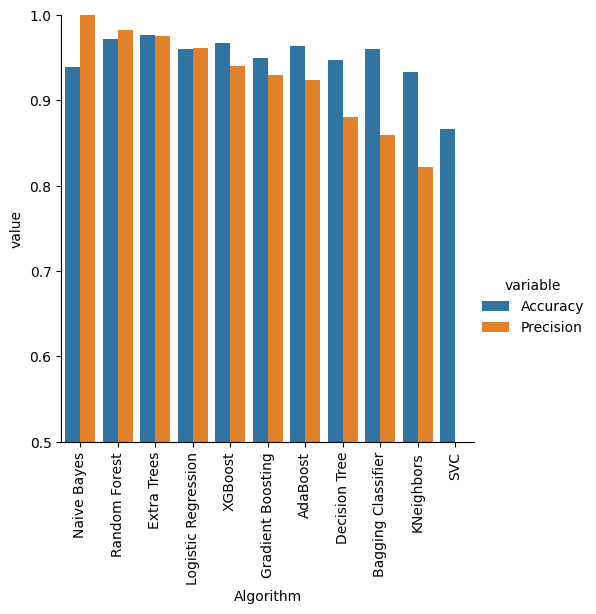

In [192]:
sns.catplot(x='Algorithm', y='value', 
               hue='variable', data=performance_df1, kind='bar', height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

5. Model Improvement

In [193]:
# I have changed the max_features hyperparameter of Tfidf.

In [194]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [195]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [196]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [197]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [198]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [199]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,Naive Bayes,0.939072,1.000000,0.939072,1.000000,0.939072,1.000000,0.939072,1.000000
1,Random Forest,0.971954,0.982301,0.971954,0.982301,0.971954,0.982301,0.971954,0.982301
2,Extra Trees,0.976789,0.975000,0.976789,0.975000,0.976789,0.975000,0.976789,0.975000
3,Logistic Regression,0.960348,0.961905,0.960348,0.961905,0.960348,0.961905,0.960348,0.961905
4,XGBoost,0.967118,0.940678,0.967118,0.940678,0.967118,0.940678,0.967118,0.940678
5,Gradient Boosting,0.949710,0.930000,0.949710,0.930000,0.949710,0.930000,0.949710,0.930000
6,AdaBoost,0.964217,0.924370,0.964217,0.924370,0.964217,0.924370,0.964217,0.924370
7,Decision Tree,0.946809,0.880734,0.946809,0.880734,0.946809,0.880734,0.946809,0.880734
8,Bagging Classifier,0.960348,0.859259,0.960348,0.859259,0.960348,0.859259,0.960348,0.859259
9,KNeighbors,0.933269,0.822430,0.933269,0.822430,0.933269,0.822430,0.933269,0.822430


In [200]:
# Now, I'm using voting classifier so that I can make the combination of my best performing models. 
# I'm checking whether other models can able to outperform naive bayes or not.
# My goal -> Precision score should be 100% and accuracy score should be greater than 97%.

svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

# Voting classifier is the combination of multiple algorithms. We usually use it because sometimes it perform betterly compared to our best performing model.

In [201]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('etc', etc)], voting='soft')

In [202]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('etc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [203]:
mnb.fit(X_train,y_train)


MultinomialNB()

In [204]:
y_pred = voting.predict(X_test)
print("Accuracy - ", accuracy_score(y_test, y_pred))
print("Precision - ", precision_score(y_test, y_pred))

Accuracy -  0.9390715667311412
Precision -  1.0


In [205]:
# Voting classifier unable to give the best result in this case.

In [206]:
# I'm applying stacking now. It is similar to voting classifier but the only difference is here we give weightage to algorithms.
estimators=[('svm', svc), ('nb', mnb), ('etc', etc)]
final_estimator=RandomForestClassifier()

In [207]:
from sklearn.ensemble import StackingClassifier

In [208]:
clf = StackingClassifier(estimators=estimators, final_estimator = final_estimator)

In [209]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy - ", accuracy_score(y_test, y_pred))
print("Precision - ", precision_score(y_test, y_pred))

Accuracy -  0.97678916827853
Precision -  0.9453125


In [159]:
# Stacking is also not performing well. So, I have decided to go with multinomial naive bayes because it is the best performing model.

In [160]:
# Whenever I'll get a new SMS or email. I'll have to perform three steps.
# 1. Text preprocessing
# 2. Vectorization
# 3. Applying an algorithm 

In [210]:
import pickle
pickle.dump(tfidf, open("vectorizer.pkl", "wb"))
pickle.dump(model, open("model.pkl", "wb"))